## Raport

### Admiration scores

#### Travel
Emotion count for 100 highest adm tr_emotion posts
Min adm: 4.0
Max adm: 5.889
{'joy': 75, 'surprise': 11, 'fear': 7, 'neutral': 5, 'sadness': 2}

Emotion count for 100 lowest adm tr_emotion posts
Min adm: 1.0
Max adm: 2.0
{'joy': 74, 'surprise': 13, 'sadness': 5, 'neutral': 4, 'fear': 4}

#### Abortion
Emotion count for 100 highest adm ab_emotion posts
Min adm: 4.0
Max adm: 5.889
{'neutral': 27, 'fear': 19, 'anger': 16, 'disgust': 14, 'sadness': 9, 'joy': 8, 'surprise': 7}

Emotion count for 100 lowest adm ab_emotion posts
Min adm: 1.0
Max adm: 2.0
{'disgust': 29, 'neutral': 23, 'anger': 16, 'sadness': 12, 'fear': 12, 'surprise': 4, 'joy': 4}

#### AI
Emotion count for 100 highest adm ai_emotion posts
Min adm: 3.778
Max adm: 5.889
{'neutral': 49, 'joy': 19, 'fear': 13, 'surprise': 11, 'disgust': 3, 'anger': 3, 'sadness': 2}

Emotion count for 100 lowest adm ai_emotion posts
Min adm: 1.111
Max adm: 2.556
{'neutral': 34, 'fear': 22, 'disgust': 19, 'joy': 11, 'surprise': 8, 'anger': 5, 'sadness': 1}

### Rivalry scores

#### Travel
Emotion count for 100 highest riv tr_emotion posts
Min riv: 2.667
Max riv: 5.333
{'joy': 57, 'surprise': 19, 'neutral': 13, 'fear': 6, 'sadness': 4, 'disgust': 1}

Emotion count for 100 lowest riv tr_emotion posts
Min riv: 1.0
Max riv: 1.333
{'joy': 83, 'surprise': 8, 'neutral': 5, 'fear': 2, 'sadness': 1, 'disgust': 1}

#### Abortion
Emotion count for 100 highest riv ab_emotion posts
Min riv: 2.667
Max riv: 5.333
{'neutral': 33, 'disgust': 24, 'fear': 13, 'anger': 11, 'sadness': 11, 'surprise': 4, 'joy': 4}

Emotion count for 100 lowest riv ab_emotion posts
Min riv: 1.0
Max riv: 1.333
{'neutral': 25, 'anger': 18, 'disgust': 18, 'fear': 16, 'sadness': 11, 'joy': 9, 'surprise': 3}

#### AI
Emotion count for 100 highest riv ai_emotion posts
Min riv: 2.333
Max riv: 5.111
{'neutral': 47, 'fear': 19, 'joy': 14, 'disgust': 9, 'surprise': 7, 'anger': 3, 'sadness': 1}

Emotion count for 100 lowest riv ai_emotion posts
Min riv: 1.0
Max riv: 1.556
{'neutral': 59, 'disgust': 11, 'joy': 9, 'fear': 8, 'surprise': 8, 'anger': 4, 'sadness': 1}


### Analiza hashtagów w postach z emocjami strachu


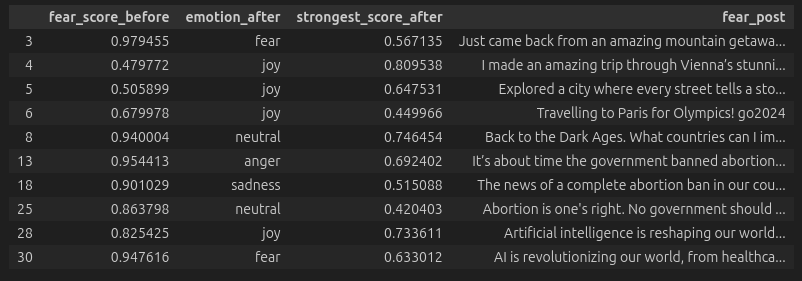

Łącznie w postach, gdzie główną wykrytą emocją był strach znalazło się 10 postów które posiadały znak '#'. Po usunięciu tego znaku (bez usuwania słowa) łącznie 8 z nich zmieniło główną wykrywaną emocję, a dwa pozostałe znacząco zmiejszyły swoją pewność w tym, że widzą strach. 

W pliku fear_data są rozpisane wszystkie posty z powyższego zestawienia (najwyższy albo najniższy narcyzm z kategorii adm lub riv).

In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline
from ast import literal_eval

/home/maciej/anaconda3/envs/narc-twitter/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the data
data = pd.read_csv("../data/reporting/emotion_data.csv")
data.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,instagram,tiktok,linkedin,pinterest,other,other_portals_7_text,post_ai,tr_emotion,ab_emotion,ai_emotion
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.333,2.778,1.0,NaN,38,1.0,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'label': 'joy', 'score': 0.8491036891937256}...","[{'label': 'disgust', 'score': 0.8329136371612...",NaN
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.778,1.222,2.0,NaN,28,8.0,British,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,"[{'label': 'surprise', 'score': 0.600716650485...","[{'label': 'anger', 'score': 0.619291424751281...",NaN
2,So excited to pick up my new BMW. It will be g...,Very unsure on the new government legislation....,3.222,1.444,2.0,NaN,31,1.0,NaN,2.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,"[{'label': 'joy', 'score': 0.9387480020523071}...","[{'label': 'fear', 'score': 0.8021630644798279...",NaN
3,Time travelling in thf future and back in time,Don't agree . There should be freedom of choice,3.889,2.667,1.0,NaN,57,1.0,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[{'label': 'neutral', 'score': 0.6699168682098...","[{'label': 'neutral', 'score': 0.7245820760726...",NaN
4,barcelona is my favourite place to visit,everyone has a right to bodily autonomy - bann...,1.444,1.778,1.0,NaN,28,1.0,NaN,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'label': 'joy', 'score': 0.9727378487586975}...","[{'label': 'disgust', 'score': 0.9855608344078...",NaN


In [3]:
data['tr_emotion'] = data['tr_emotion'].apply(literal_eval)
data['ab_emotion'] = data['ab_emotion'].apply(literal_eval)
data['ai_emotion'] = data['ai_emotion'].apply(lambda x: literal_eval(x) if x is not np.nan else x)

In [4]:
emotion_data = data[['adm','riv','tr_emotion', 'ab_emotion', 'ai_emotion']]

In [5]:
emotion_data.sort_values('adm', ascending=False)

,adm,riv,tr_emotion,ab_emotion,ai_emotion
473,5.889,1.333,"[{'label': 'joy', 'score': 0.949002742767334},...","[{'label': 'neutral', 'score': 0.7747001051902...","[{'label': 'joy', 'score': 0.6417862772941589}..."
475,5.778,1.556,"[{'label': 'joy', 'score': 0.8644006252288818}...","[{'label': 'neutral', 'score': 0.4846586287021...","[{'label': 'neutral', 'score': 0.9498113989830..."
186,5.778,1.222,"[{'label': 'joy', 'score': 0.99103844165802}, ...","[{'label': 'disgust', 'score': 0.5919543504714...","[{'label': 'neutral', 'score': 0.7998800277709..."
427,5.667,3.889,"[{'label': 'joy', 'score': 0.9832547903060913}...","[{'label': 'neutral', 'score': 0.3571069836616...","[{'label': 'joy', 'score': 0.625338077545166},..."
454,5.667,1.222,"[{'label': 'joy', 'score': 0.9482114911079407}...","[{'label': 'fear', 'score': 0.7384099960327148...","[{'label': 'surprise', 'score': 0.563477158546..."
...,...,...,...,...,...
190,1.111,1.333,"[{'label': 'joy', 'score': 0.576411783695221},...","[{'label': 'anger', 'score': 0.815036416053772...","[{'label': 'surprise', 'score': 0.623047113418..."
234,1.111,2.111,"[{'label': 'joy', 'score': 0.9491862058639526}...","[{'label': 'sadness', 'score': 0.5191503167152...","[{'label': 'neutral', 'score': 0.8847773671150..."
75,1.111,1.000,"[{'label': 'joy', 'score': 0.8937405943870544}...","[{'label': 'surprise', 'score': 0.484850227832...",NaN
96,1.000,1.000,"[{'label': 'joy', 'score': 0.9773700833320618}...","[{'label': 'anger', 'score': 0.593105316162109...",NaN


In [6]:
adm_narc = emotion_data.sort_values('adm', ascending=False).head(100)

In [7]:
adm_narc

,adm,riv,tr_emotion,ab_emotion,ai_emotion
473,5.889,1.333,"[{'label': 'joy', 'score': 0.949002742767334},...","[{'label': 'neutral', 'score': 0.7747001051902...","[{'label': 'joy', 'score': 0.6417862772941589}..."
475,5.778,1.556,"[{'label': 'joy', 'score': 0.8644006252288818}...","[{'label': 'neutral', 'score': 0.4846586287021...","[{'label': 'neutral', 'score': 0.9498113989830..."
186,5.778,1.222,"[{'label': 'joy', 'score': 0.99103844165802}, ...","[{'label': 'disgust', 'score': 0.5919543504714...","[{'label': 'neutral', 'score': 0.7998800277709..."
427,5.667,3.889,"[{'label': 'joy', 'score': 0.9832547903060913}...","[{'label': 'neutral', 'score': 0.3571069836616...","[{'label': 'joy', 'score': 0.625338077545166},..."
454,5.667,1.222,"[{'label': 'joy', 'score': 0.9482114911079407}...","[{'label': 'fear', 'score': 0.7384099960327148...","[{'label': 'surprise', 'score': 0.563477158546..."
...,...,...,...,...,...
197,4.000,1.889,"[{'label': 'joy', 'score': 0.6683497428894043}...","[{'label': 'disgust', 'score': 0.9367507696151...","[{'label': 'disgust', 'score': 0.5375816822052..."
327,4.000,1.333,"[{'label': 'joy', 'score': 0.8978943228721619}...","[{'label': 'neutral', 'score': 0.5291731357574...","[{'label': 'neutral', 'score': 0.4680078923702..."
195,4.000,2.667,"[{'label': 'fear', 'score': 0.6799777150154114...","[{'label': 'fear', 'score': 0.8637983798980713...","[{'label': 'neutral', 'score': 0.7348264455795..."
266,4.000,3.222,"[{'label': 'joy', 'score': 0.979314923286438},...","[{'label': 'neutral', 'score': 0.8679047822952...","[{'label': 'fear', 'score': 0.9749070405960083..."


In [8]:
type(data['tr_emotion'][0])

list

In [9]:
adm_tr_emotion_high = {}
for i in range(len(adm_narc)):
    label  = adm_narc.tr_emotion.iloc[i][0]['label']
    if label in adm_tr_emotion_high:
        adm_tr_emotion_high[label] += 1
    else:
        adm_tr_emotion_high[label] = 1

def get_emotion_count(data, narc_type, emotion_type, low = True, n = 100):
    temp_data = data[data[emotion_type].notna()]
    temp_data = temp_data.sort_values(narc_type, ascending=low).head(n)
    min = temp_data[narc_type].min()
    max = temp_data[narc_type].max()
    temp_data = temp_data[[emotion_type]]
    emotion_count = {}
    for i in range(n):
        label  = temp_data.iloc[i,0][0]['label']
        if label in emotion_count:
            emotion_count[label] += 1
        else:
            emotion_count[label] = 1
    #sort emotion count
    emotion_count = dict(sorted(emotion_count.items(), key=lambda item: item[1], reverse=True))

    return emotion_count, min, max

def print_emotion_count(data, narc_type, emotion_type, n = 100):
    emotion_count, min, max = get_emotion_count(data, narc_type, emotion_type,low = False, n = n)
    print(f"Emotion count for {n} highest {narc_type} {emotion_type} posts")
    print(f"Min {narc_type}: {min}")
    print(f"Max {narc_type}: {max}")
    print(emotion_count)
    emotion_count, min, max = get_emotion_count(data, narc_type, emotion_type,low = True, n = n)
    print("\n")
    print(f"Emotion count for {n} lowest {narc_type} {emotion_type} posts")
    print(f"Min {narc_type}: {min}")
    print(f"Max {narc_type}: {max}")
    print(emotion_count)

In [10]:
print_emotion_count(emotion_data,'adm','tr_emotion', n = 100)

Emotion count for 100 highest adm tr_emotion posts
Min adm: 4.0
Max adm: 5.889
{'joy': 75, 'surprise': 11, 'fear': 7, 'neutral': 5, 'sadness': 2}


Emotion count for 100 lowest adm tr_emotion posts
Min adm: 1.0
Max adm: 2.0
{'joy': 74, 'surprise': 13, 'sadness': 5, 'neutral': 4, 'fear': 4}


In [11]:
print_emotion_count(emotion_data,'adm','ab_emotion', n = 100)

Emotion count for 100 highest adm ab_emotion posts
Min adm: 4.0
Max adm: 5.889
{'neutral': 27, 'fear': 19, 'anger': 16, 'disgust': 14, 'sadness': 9, 'joy': 8, 'surprise': 7}


Emotion count for 100 lowest adm ab_emotion posts
Min adm: 1.0
Max adm: 2.0
{'disgust': 29, 'neutral': 23, 'anger': 16, 'sadness': 12, 'fear': 12, 'surprise': 4, 'joy': 4}


In [12]:
print_emotion_count(emotion_data,'adm','ai_emotion', n = 100)

Emotion count for 100 highest adm ai_emotion posts
Min adm: 3.778
Max adm: 5.889
{'neutral': 49, 'joy': 19, 'fear': 13, 'surprise': 11, 'disgust': 3, 'anger': 3, 'sadness': 2}


Emotion count for 100 lowest adm ai_emotion posts
Min adm: 1.111
Max adm: 2.556
{'neutral': 34, 'fear': 22, 'disgust': 19, 'joy': 11, 'surprise': 8, 'anger': 5, 'sadness': 1}


In [13]:
print_emotion_count(emotion_data,'riv','tr_emotion', n = 100)

Emotion count for 100 highest riv tr_emotion posts
Min riv: 2.667
Max riv: 5.333
{'joy': 57, 'surprise': 19, 'neutral': 13, 'fear': 6, 'sadness': 4, 'disgust': 1}


Emotion count for 100 lowest riv tr_emotion posts
Min riv: 1.0
Max riv: 1.333
{'joy': 83, 'surprise': 8, 'neutral': 5, 'fear': 2, 'sadness': 1, 'disgust': 1}


In [14]:
print_emotion_count(emotion_data,'riv','ab_emotion', n = 100)

Emotion count for 100 highest riv ab_emotion posts
Min riv: 2.667
Max riv: 5.333
{'neutral': 33, 'disgust': 24, 'fear': 13, 'anger': 11, 'sadness': 11, 'surprise': 4, 'joy': 4}


Emotion count for 100 lowest riv ab_emotion posts
Min riv: 1.0
Max riv: 1.333
{'neutral': 25, 'anger': 18, 'disgust': 18, 'fear': 16, 'sadness': 11, 'joy': 9, 'surprise': 3}


In [15]:
print_emotion_count(emotion_data,'riv','ai_emotion', n = 100)

Emotion count for 100 highest riv ai_emotion posts
Min riv: 2.333
Max riv: 5.111
{'neutral': 47, 'fear': 19, 'joy': 14, 'disgust': 9, 'surprise': 7, 'anger': 3, 'sadness': 1}


Emotion count for 100 lowest riv ai_emotion posts
Min riv: 1.0
Max riv: 1.556
{'neutral': 59, 'disgust': 11, 'joy': 9, 'fear': 8, 'surprise': 8, 'anger': 4, 'sadness': 1}


## Analyze Fear emotion

In [51]:
def get_emotion_data(data, narc_type, emotion_base, emotion_type, low = False, n = 100):
    fear_list = []
    temp_data = data[data[emotion_base].notna()]
    temp_data = temp_data.sort_values(narc_type, ascending=low).head(n)
    temp_data = temp_data.reset_index(drop=True)
    for i in range(n):
        array_data = temp_data[emotion_base].iloc[i]
        label  = array_data[0]['label']
        if label in emotion_type:
            fear_list.append(i)
    return temp_data.iloc[fear_list]

In [52]:
fear_data_tr_adm = get_emotion_data(data, 'adm', 'tr_emotion', 'fear', low = False, n = 100)
fear_data_tr_adm['post_type'] = 'travel'
fear_data_ab_adm = get_emotion_data(data, 'adm', 'ab_emotion', 'fear', low = False, n = 100)
fear_data_ab_adm['post_type'] = 'abortion'
fear_data_ai_adm = get_emotion_data(data, 'adm', 'ai_emotion', 'fear', low = False, n = 100)
fear_data_ai_adm['post_type'] = 'ai'

In [53]:
df = pd.concat([fear_data_tr_adm, fear_data_ab_adm, fear_data_ai_adm])

In [54]:
df.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,tiktok,linkedin,pinterest,other,other_portals_7_text,post_ai,tr_emotion,ab_emotion,ai_emotion,post_type
15,The Metaverse As I learn more about the Metave...,I'm deeply concerned and disappointed by the g...,5.333,1.778,1.0,NaN,57,1.0,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,Artificial intelligence (AI) is transforming o...,"[{'label': 'fear', 'score': 0.9810855388641357...","[{'label': 'sadness', 'score': 0.4471192955970...","[{'label': 'surprise', 'score': 0.583991885185...",travel
24,I woke u one day and felt dizzy i heard a blas...,Banning abortion is a very good because it wil...,5.111,3.111,1.0,NaN,20,5.0,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,"AI has immense potential, but responsible deve...","[{'label': 'fear', 'score': 0.6964660286903381...","[{'label': 'disgust', 'score': 0.7911884784698...","[{'label': 'neutral', 'score': 0.9163761138916...",travel
27,I recently got back from a trip across some of...,An abortion ban is a welcomed development as f...,5.111,3.000,1.0,NaN,38,5.0,NaN,2.0,...,1.0,1.0,1.0,NaN,NaN,The emergence of artificial intelligence popul...,"[{'label': 'fear', 'score': 0.9818339943885803...","[{'label': 'joy', 'score': 0.39843249320983887...","[{'label': 'neutral', 'score': 0.3522013425827...",travel
30,Just came back from an amazing mountain getawa...,The government's total ban on abortion is alar...,5.000,1.889,1.0,NaN,44,5.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,Artificial intelligence is reshaping our world...,"[{'label': 'fear', 'score': 0.979454755783081}...","[{'label': 'fear', 'score': 0.9744153022766113...","[{'label': 'fear', 'score': 0.8254252076148987...",travel
34,I made an amazing trip through Vienna’s stunni...,The complete ban on abortion is deeply troubli...,4.889,1.444,1.0,NaN,60,5.0,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,Artificial Intelligence is transforming how we...,"[{'label': 'fear', 'score': 0.4797717332839966...","[{'label': 'fear', 'score': 0.9321100115776062...","[{'label': 'neutral', 'score': 0.9095643162727...",travel


In [55]:
df = df[['adm','riv','post_type','post_travel','post_abortion','post_ai','tr_emotion','ab_emotion','ai_emotion']].reset_index(drop=True)

In [56]:
fear_text_column = []
for i in range(df.shape[0]):
    type = df['post_type'][i]
    fear_text_column.append(df['post_'+type].iloc[i])

fear_score_column = []
for i in range(df.shape[0]):
    type = df['post_type'][i]
    if type == 'travel':
        fear_score_column.append(df['tr_emotion'][i][0]['score'])
    elif type == 'abortion':
        fear_score_column.append(df['ab_emotion'][i][0]['score'])
    else:
        fear_score_column.append(df['ai_emotion'][i][0]['score'])

df['fear_post'] = fear_text_column
df['fear_score_before'] = fear_score_column

In [57]:
# Count the number of posts with # symbol
a = 0
for type in ['post_travel','post_abortion','post_ai']:
    a += df[type].str.contains('#').sum()
a

25

In [58]:
df[['fear_score_before', 'fear_post']].head()

,fear_score_before,fear_post
0,0.981086,The Metaverse As I learn more about the Metave...
1,0.696466,I woke u one day and felt dizzy i heard a blas...
2,0.981834,I recently got back from a trip across some of...
3,0.979455,Just came back from an amazing mountain getawa...
4,0.479772,I made an amazing trip through Vienna’s stunni...


In [59]:
df['fear_post'].str.contains('#').sum()

10

In [60]:
# remove the # symbol from the text
df_fear_test = pd.DataFrame(df[df.fear_post.str.contains('#')])
df_fear_test['fear_post'] = df_fear_test['fear_post'].str.replace('#','')
df_fear_test['fear_post'].str.contains('#').sum()


0

In [61]:
# calculate the fear score after removing the # symbol
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

df_fear_test["emotions_after"] = df_fear_test['fear_post'].apply(lambda x: classifier(x)[0])
df_fear_test['strongest_score_after'] = df_fear_test['emotions_after'].apply(lambda x: x[0]['score'])
df_fear_test['emotion_after'] = df_fear_test['emotions_after'].apply(lambda x: x[0]['label'])

In [62]:
df_fear_test[['fear_score_before', 'emotion_after', 'strongest_score_after', 'fear_post']]

,fear_score_before,emotion_after,strongest_score_after,fear_post
3,0.979455,fear,0.567135,Just came back from an amazing mountain getawa...
4,0.479772,joy,0.809538,I made an amazing trip through Vienna’s stunni...
5,0.505899,joy,0.647531,Explored a city where every street tells a sto...
6,0.679978,joy,0.449966,Travelling to Paris for Olympics! go2024
8,0.940004,neutral,0.746454,Back to the Dark Ages. What countries can I im...
13,0.954413,anger,0.692402,It’s about time the government banned abortion...
18,0.901029,sadness,0.515088,The news of a complete abortion ban in our cou...
25,0.863798,neutral,0.420403,Abortion is one's right. No government should ...
28,0.825425,joy,0.733611,Artificial intelligence is reshaping our world...
30,0.947616,fear,0.633012,"AI is revolutionizing our world, from healthca..."


In [69]:
fear_data = df[['adm', 'riv','post_type', 'fear_post', 'fear_score_before']]

In [68]:
# save data into reporting folder
fear_data.to_csv("../data/reporting/fear_data.csv", index=False)
